In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

data = pd.read_csv('../data/dataset.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [24]:
with open('../data/X_train.pkl', 'rb') as f1, open('../data/X_test.pkl', 'rb') as f2, open('../data/y_train.pkl', 'rb') as f3, open('../data/y_test.pkl', 'rb') as f4:
    X_train, X_test, y_train, y_test = pickle.load(f1), pickle.load(f2), pickle.load(f3), pickle.load(f4)

Training a baseline gradient boosting model

In [25]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softmax")

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7548022598870057


Hyperparameter Tuning using GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}

xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_params = grid_search.best_params_
final_model = xgb.XGBClassifier(**best_params, objective="multi:softmax", num_class=3, random_state=42)

final_model.fit(X_train, y_train)
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print("Final Accuracy:", final_accuracy)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best Score: 0.7863791463892152
Final Accuracy: 0.7649717514124293


Feature importance

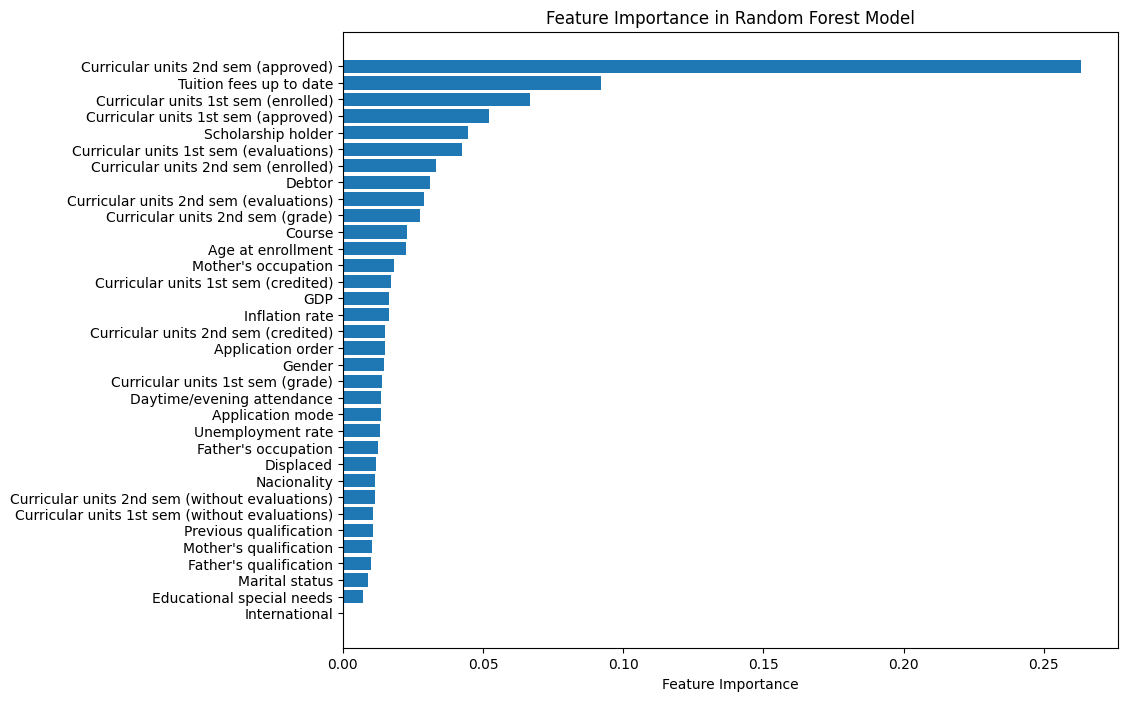

In [31]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = final_model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()